In [84]:
import argparse
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages
import xbpch
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from dask.diagnostics import ProgressBar
from matplotlib import colorbar, colors
from decimal import Decimal
import statistics


from sklearn.metrics import r2_score

OLD = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.bpch'
NEW = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.new.bpch'
OLD_ds = xbpch.open_bpchdataset(OLD)
NEW_ds = xbpch.open_bpchdataset(NEW)


AnHgObs= pd.read_csv('~/Documents/HG/data/TGMSiteAnnual1.csv', na_values=(-9999))

/home/brittany/anaconda3/envs/geoschem/lib/python3.6/site-packages/pandas/io/parsers.py:710: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [83]:
OLD_Hg0=((OLD_ds['IJ_AVG_S_Hg0'].isel(lev=0).mean('time')) * 8.93)              #*1e3)

                             
OLD_Hg2=((OLD_ds['IJ_AVG_S_Hg2'].isel(lev=0).mean('time'))  * 8.93)                 #   *1e3)
TGM_Old = (OLD_Hg0 + OLD_Hg2)



# Setting variables for the new model data set
NEW_Hg0=((NEW_ds['IJ_AVG_S_Hg0'].isel(lev=0).mean('time'))*8.93)

                             
NEW_Hg2=((NEW_ds['IJ_AVG_S_Hg2'].isel(lev=0).mean('time'))*8.93)

TGM_New = NEW_Hg0 + NEW_Hg2

Abs_diff = TGM_New - TGM_Old
Perc_diff = (Abs_diff / TGM_Old)*100
print (TGM_Old)

<xarray.DataArray (lon: 144, lat: 91)>
dask.array<add, shape=(144, 91), dtype=float32, chunksize=(144, 91)>
Coordinates:
    lev      float64 0.9925
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 -170.0 -167.5 -165.0 ...
  * lat      (lat) float64 -89.5 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 ...


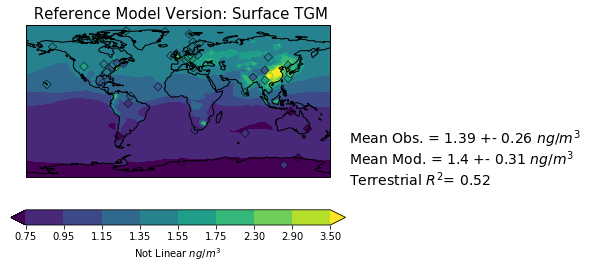

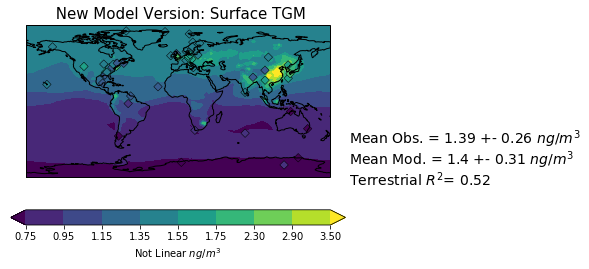

In [109]:
Levels= (0.75, 0.95, 1.15, 1.35, 1.55, 1.75, 2.30, 2.90, 3.50)
#AnHgObs.

Long=(AnHgObs['Lon'])#, AnHgObs['Hg0'])
Lati=(AnHgObs['Lat'])#,AnHgObs['Hg0'])
Value= AnHgObs['Hg0']
Meanobvs=np.mean(Value)
#MeanModOld=np.mean(TGM_Old)
MeanModNew=np.mean(TGM_New)

ErrObs= round(statistics.stdev(Value),2)


OLDval=np.zeros(len(Lati))

NEWval=np.zeros(len(Lati))

for i in range(len(Lati)):
    OLDval[i]= (TGM_Old.sel(lat=[Lati[i]], lon=[Long[i]], method='nearest'))
    NEWval[i]= (TGM_New.sel(lat=[Lati[i]], lon=[Long[i]], method='nearest'))


    
MeanModOld=(np.mean(OLDval))
MeanModNew=(np.mean(NEWval))
ErrOLD= round(statistics.stdev(OLDval),2)
ErrNEW= round(statistics.stdev(NEWval),2)
#print (statistics.stdev(NEWval), statistics.stdev(OLDval))
#print (MeanModNew, MeanModOld)
#print (MeanModOld)
MeObsDP=round(Meanobvs,2)
MeMoOl=round(MeanModOld,2)
MeMoNe= round(MeanModNew,2)

CoeffOld= r2_score(Value, OLDval)
CoeffNew= r2_score(Value, NEWval)



textstr1= "Mean Obs. = %s +- %s $ng/m^3$ "%(MeObsDP, ErrObs)
 #"There are %d types of people." % 10

textstr2= "Mean Mod. = %s +- %s $ng/m^3$ "%(MeMoOl ,ErrOLD)
textstr3= "Mean Mod. = %s +- %s $ng/m^3$ "%(MeMoNe ,ErrNEW)
textstr4= "Terrestrial $R^2$= %s" %(round(CoeffOld,3))
textstr5= "Terrestrial $R^2$= %s" %(round(CoeffNew,3))




fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

im=TGM_Old.plot.contourf( x='lon',y='lat', ax=ax, levels= Levels, transform=ccrs.PlateCarree(), cmap='viridis', 
                         cbar_kwargs={'orientation':'horizontal',
                                       'ticklocation':'auto',
                                      'label':"Not Linear $ng/m^3$ "})
plt.text(200,-50,textstr1, fontsize=14)
plt.text(200,-75,textstr2, fontsize=14)
plt.text(200,-100,textstr4, fontsize=14)

plt.scatter(Long, Lati,  transform=ccrs.PlateCarree(),marker='D',
            norm=colors.BoundaryNorm(boundaries=Levels, ncolors=256), 
            linewidths=0.5, edgecolors='black',
            label=None, c=Value, cmap='viridis')


plt.title(' Reference Model Version: Surface TGM',fontsize=15)             
ax.coastlines()
     
    

plt.show()



#print (Long, Lati)

#print (Meanobvs)
#print (MeanMod)
##     transform=ccrs.Geodetic(),
  


fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

im=TGM_New.plot.contourf(x='lon',y='lat',levels=Levels, ax=ax,transform=ccrs.PlateCarree(), cmap='viridis', 
                         cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"Not Linear $ng/m^3$ "})
plt.text(200,-50,textstr1, fontsize=14)
plt.text(200,-75,textstr3, fontsize=14)
plt.text(200,-100,textstr5, fontsize=14)
plt.scatter(Long, Lati,  transform=ccrs.PlateCarree(),marker='D',
            norm=colors.BoundaryNorm(boundaries=Levels, ncolors=256), 
            linewidths=0.5, edgecolors='black',
            label=None, c=Value, cmap='viridis')

plt.title(' New Model Version: Surface TGM', fontsize=15)             
ax.coastlines()
plt.show()  

In [ ]:
Long=(AnHgObs['Lon'])#, AnHgObs['Hg0'])
Lati=(AnHgObs['Lat'])#,AnHgObs['Hg0'])
Value= AnHgObs['Hg0']
Meanobvs=Value.mean
MeanMod=TGM_Old.mean
c=Value
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())


plt.scatter(Long, Lati,  transform=ccrs.PlateCarree(),marker='D',
            norm=colors.BoundaryNorm(boundaries=Levels, ncolors=256), 
            linewidths=0.5, edgecolors='black',
            label=None, c=Value, cmap='viridis')

plt.colorbar()
plt.title(' Reference Model Version: Surface TGM')             
ax.coastlines()
     
    

plt.show()
#vmin=0.75, vmax=3.5,
Long=(AnHgObs['Lon'])#, AnHgObs['Hg0'])
Lati=(AnHgObs['Lat'])#,AnHgObs['Hg0'])
Value= AnHgObs['Hg0']
Meanobvs=Value.mean
MeanMod=TGM_Old.mean
c=Value
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())


plt.scatter(Long, Lati,  transform=ccrs.PlateCarree(),marker='D',
            vmin=0.75, vmax=3.5, 
            linewidths=0.5, edgecolors='black',
            label=None, c=Value, cmap='viridis')

plt.colorbar()
plt.title(' Reference Model Version: Surface TGM')             
ax.coastlines()
     
    

plt.show()

In [ ]:

Long=(AnHgObs['Lon'])#, AnHgObs['Hg0'])
Lati=(AnHgObs['Lat'])#,AnHgObs['Hg0'])
Value= AnHgObs['Hg0']
Meanobvs=np.mean(Value)
#MeanModOld=np.mean(TGM_Old)
MeanModNew=np.mean(TGM_New)

ErrObs= round(statistics.stdev(Value),2)


OLDval=np.zeros(len(Lati))

NEWval=np.zeros(len(Lati))

for i in range(len(Lati)):
    OLDval[i]= (TGM_Old.sel(lat=[Lati[i]], lon=[Long[i]], method='nearest'))
    NEWval[i]= (TGM_New.sel(lat=[Lati[i]], lon=[Long[i]], method='nearest'))


    
MeanModOld=(np.mean(OLDval))
MeanModNew=(np.mean(NEWval))
ErrOLD= round(statistics.stdev(OLDval),2)
ErrNEW= round(statistics.stdev(NEWval),2)
#print (statistics.stdev(NEWval), statistics.stdev(OLDval))
#print (MeanModNew, MeanModOld)
#print (MeanModOld)
MeObsDP=round(Meanobvs,2)
MemMoOl=round(MeanModOld,2)
MeMoNe= round(MeanModNew,2)

CoeffOld= r2_score(Value, OLDval)
CoeffNew= r2_score(Value, NEWval)


print (CoeffOld, CoeffNew)


In [ ]:
print ( mean(Value))

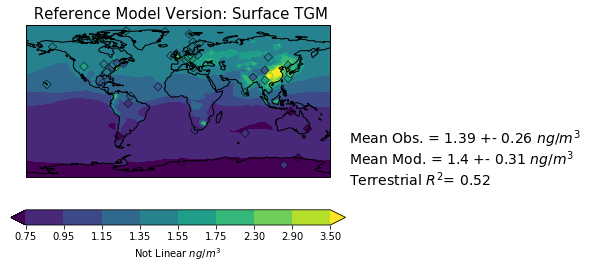

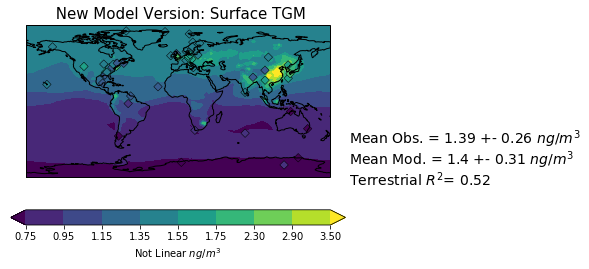

In [111]:
Levels= (0.75, 0.95, 1.15, 1.35, 1.55, 1.75, 2.30, 2.90, 3.50)
#AnHgObs.

Long=(AnHgObs['Lon'])#, AnHgObs['Hg0'])
Lati=(AnHgObs['Lat'])#,AnHgObs['Hg0'])
Value= AnHgObs['Hg0']
Meanobvs=np.mean(Value)
#MeanModOld=np.mean(TGM_Old)
MeanModNew=np.mean(TGM_New)

ErrObs= round(statistics.stdev(Value),2)


OLDval=np.zeros(len(Lati))

NEWval=np.zeros(len(Lati))

for i in range(len(Lati)):
    OLDval[i]= (TGM_Old.sel(lat=[Lati[i]], lon=[Long[i]], method='nearest'))
    NEWval[i]= (TGM_New.sel(lat=[Lati[i]], lon=[Long[i]], method='nearest'))


    
MeanModOld=(np.mean(OLDval))
MeanModNew=(np.mean(NEWval))
ErrOLD= round(statistics.stdev(OLDval),2)
ErrNEW= round(statistics.stdev(NEWval),2)
#print (statistics.stdev(NEWval), statistics.stdev(OLDval))
#print (MeanModNew, MeanModOld)
#print (MeanModOld)
MeObsDP=round(Meanobvs,2)
MeMoOl=round(MeanModOld,2)
MeMoNe= round(MeanModNew,2)

CoeffOld= r2_score(Value, OLDval)
CoeffNew= r2_score(Value, NEWval)



textstr1= "Mean Obs. = %s +- %s $ng/m^3$ "%(MeObsDP, ErrObs)
 #"There are %d types of people." % 10

textstr2= "Mean Mod. = %s +- %s $ng/m^3$ "%(MeMoOl ,ErrOLD)
textstr3= "Mean Mod. = %s +- %s $ng/m^3$ "%(MeMoNe ,ErrNEW)
textstr4= "Terrestrial $R^2$= %s" %(round(CoeffOld,3))
textstr5= "Terrestrial $R^2$= %s" %(round(CoeffNew,3))




fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

im=TGM_Old.plot.contourf( x='lon',y='lat', ax=ax, levels= Levels, transform=ccrs.PlateCarree(), cmap='viridis', 
                         cbar_kwargs={'orientation':'horizontal',
                                       'ticklocation':'auto',
                                      'label':"Not Linear $ng/m^3$ "})
plt.text(200,-50,textstr1, fontsize=14)
plt.text(200,-75,textstr2, fontsize=14)
plt.text(200,-100,textstr4, fontsize=14)

plt.scatter(Long, Lati,  transform=ccrs.PlateCarree(),marker='D',
            norm=colors.BoundaryNorm(boundaries=Levels, ncolors=256), 
            linewidths=0.5, edgecolors='black',
            label=None, c=Value, cmap='viridis')


plt.title(' Reference Model Version: Surface TGM',fontsize=15)             
ax.coastlines()
     
    

plt.show()



#print (Long, Lati)

#print (Meanobvs)
#print (MeanMod)
##     transform=ccrs.Geodetic(),
  


fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

im=TGM_New.plot.contourf(x='lon',y='lat',levels=Levels, ax=ax,transform=ccrs.PlateCarree(), cmap='viridis', 
                         cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"Not Linear $ng/m^3$ "})
plt.text(200,-50,textstr1, fontsize=14)
plt.text(200,-75,textstr3, fontsize=14)
plt.text(200,-100,textstr5, fontsize=14)
plt.scatter(Long, Lati,  transform=ccrs.PlateCarree(),marker='D',
            norm=colors.BoundaryNorm(boundaries=Levels, ncolors=256), 
            linewidths=0.5, edgecolors='black',
            label=None, c=Value, cmap='viridis')

plt.title(' New Model Version: Surface TGM', fontsize=15)             
ax.coastlines()
plt.show()  